<a href="https://colab.research.google.com/github/AdriBoui/AdriBoui/blob/main/Challenge_2_Working_with_multiple_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Handling multiple CSVs

To practice loading multiple CSVs and merging them, we're going to use the [Olympic Sports and Medals, 1896-2014](https://www.kaggle.com/the-guardian/olympic-games) which contains 3 files:

- `dictionary.csv`
- `summer.csv`
- `winter.csv`

Make sure you download those files and put them in the _same folder_ as the notebook you are working on.

Go ahead and write the code to load `dictionary.csv` into the DataFrame `countries_df`:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df_dictionary = pd.read_csv('/content/drive/MyDrive/le_wagon/csv_files/dictionary.csv')
df_summer = pd.read_csv('/content/drive/MyDrive/le_wagon/csv_files/summer.csv')
df_winter = pd.read_csv('/content/drive/MyDrive/le_wagon/csv_files/winter.csv')

In [ ]:
df_dictionary

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


Now load the CSV of **Summer** Games in a `summer_df` dataframe. On which column should we merge `countries_df` and `summer_df`? Do they have the same name? If not, use the [`pandas.DataFrame.rename()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) function.

In [ ]:
df_summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


Do the same for **Winter** Games in a `winter_df` dataframe.

In [ ]:
df_winter

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold
...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


### Merging the data

Time to perform a merge of `countries_df` and `summer_df` on the one hand (into a new DataFrame `summer_countries_df`). As we'll want to merge all games into one DataFrame at the end, **add a `Season`** column to the `summer_countries_df`.

In [ ]:
summer_countries_df = pd.merge(df_dictionary, df_summer, left_on='Code', right_on='Country')
summer_countries_df['Season'] = 'Summer'

Repeat the same approach to create a `winter_countries_df`

In [ ]:
winter_countries_df = pd.merge(df_dictionary, df_winter, left_on='Code', right_on='Country')
winter_countries_df['Season'] = 'Winter'

Concatenate `summer_countries_df` and `winter_countries_df` (they have the same columns!) into an `all_df` DataFrame.

In [ ]:
all_df = pd.concat([summer_countries_df, winter_countries_df])
all_df

,Country_x,Code,Population,GDP per Capita,Year,City,Sport,Discipline,Athlete,Country_y,Gender,Event,Medal,Season
0,Afghanistan,AFG,32526562.0,594.323081,2008,Beijing,Taekwondo,Taekwondo,"NIKPAI, Rohullah",AFG,Men,- 58 KG,Bronze,Summer
1,Afghanistan,AFG,32526562.0,594.323081,2012,London,Taekwondo,Taekwondo,"NIKPAI, Rohullah",AFG,Men,58 - 68 KG,Bronze,Summer
2,Algeria,ALG,39666519.0,4206.031232,1984,Los Angeles,Boxing,Boxing,"ZAOUI, Mohamed",ALG,Men,71-75KG,Bronze,Summer
3,Algeria,ALG,39666519.0,4206.031232,1984,Los Angeles,Boxing,Boxing,"MOUSSA, Mustapha",ALG,Men,75 - 81KG (Light-Heavyweight),Bronze,Summer
4,Algeria,ALG,39666519.0,4206.031232,1992,Barcelona,Athletics,Athletics,"BOULMERKA, Hassiba",ALG,Women,1500M,Gold,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4821,United States,USA,321418820.0,56115.718426,2014,Sochi,Skiing,Snowboard,"DEIBOLD, Alex",USA,Men,Snowboard Cross,Bronze,Winter
4822,United States,USA,321418820.0,56115.718426,2014,Sochi,Skiing,Snowboard,"CLARK, Kelly",USA,Women,Half-Pipe,Bronze,Winter
4823,United States,USA,321418820.0,56115.718426,2014,Sochi,Skiing,Snowboard,"FARRINGTON, Kaitlyn",USA,Women,Half-Pipe,Gold,Winter
4824,United States,USA,321418820.0,56115.718426,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,Winter


In [ ]:
all_df = all_df.drop(columns=['Country_y']).rename(columns={'Country_x': 'Country'})
all_df

,Country,Code,Population,GDP per Capita,Year,City,Sport,Discipline,Athlete,Gender,Event,Medal,Season
0,Afghanistan,AFG,32526562.0,594.323081,2008,Beijing,Taekwondo,Taekwondo,"NIKPAI, Rohullah",Men,- 58 KG,Bronze,Summer
1,Afghanistan,AFG,32526562.0,594.323081,2012,London,Taekwondo,Taekwondo,"NIKPAI, Rohullah",Men,58 - 68 KG,Bronze,Summer
2,Algeria,ALG,39666519.0,4206.031232,1984,Los Angeles,Boxing,Boxing,"ZAOUI, Mohamed",Men,71-75KG,Bronze,Summer
3,Algeria,ALG,39666519.0,4206.031232,1984,Los Angeles,Boxing,Boxing,"MOUSSA, Mustapha",Men,75 - 81KG (Light-Heavyweight),Bronze,Summer
4,Algeria,ALG,39666519.0,4206.031232,1992,Barcelona,Athletics,Athletics,"BOULMERKA, Hassiba",Women,1500M,Gold,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4821,United States,USA,321418820.0,56115.718426,2014,Sochi,Skiing,Snowboard,"DEIBOLD, Alex",Men,Snowboard Cross,Bronze,Winter
4822,United States,USA,321418820.0,56115.718426,2014,Sochi,Skiing,Snowboard,"CLARK, Kelly",Women,Half-Pipe,Bronze,Winter
4823,United States,USA,321418820.0,56115.718426,2014,Sochi,Skiing,Snowboard,"FARRINGTON, Kaitlyn",Women,Half-Pipe,Gold,Winter
4824,United States,USA,321418820.0,56115.718426,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",Women,Slopestyle,Gold,Winter


### Top 10 Countries since 1984

Use boolean indexing, grouping & sorting to print a list of the Top 10 countries who won the most medals _since 1984_. Then plot it. Go step by step!

In [ ]:
top_10 = all_df[all_df['Year'] >= 1984].groupby('Country')['Medal'].count().sort_values(ascending=False)[:10]
top_10

,Medal
Country,
United States,2472
Germany,1112
Russia,1031
Australia,891
China,889
Canada,801
Italy,632
"Korea, South",587
France,587


Plot the result as a barchart.

<Axes: xlabel='Country'>

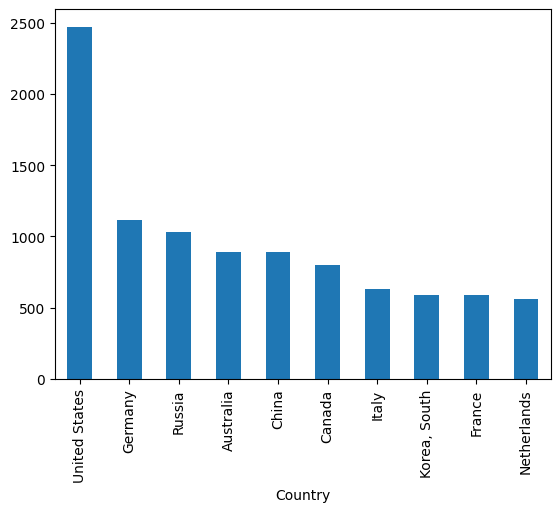

In [ ]:
top_10.plot(kind='bar')

Let's reuse `all_df` to group but this time we don't just want to count the total number of medals for each country, we want to count the number of medal for Winter Games on the one hand, and for Summer Games on the other hand. Then we want to plot them (sorting should still be based on the _total_ number of medals).

**Hint 1** The [`pandas.DataFrame.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) can group over a **`list`** of columns.

**Hint 2** You need to use the [`pandas.DataFrame.unstack()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html) function

In [ ]:
season_count_df = all_df.groupby(['Country', 'Season'])['Medal'].count().unstack()
season_count_df

Season,Summer,Winter
Country,,
Afghanistan,2.0,NaN
Algeria,15.0,NaN
Argentina,259.0,NaN
Armenia,11.0,NaN
Australia,1189.0,15.0
...,...,...
Venezuela,12.0,NaN
Vietnam,2.0,NaN
Virgin Islands*,1.0,NaN


In [ ]:
season_count_df = all_df.groupby(['Country', 'Season'])['Medal'].count().unstack().fillna(0)
season_count_df

Season,Summer,Winter
Country,,
Afghanistan,2.0,0.0
Algeria,15.0,0.0
Argentina,259.0,0.0
Armenia,11.0,0.0
Australia,1189.0,15.0
...,...,...
Venezuela,12.0,0.0
Vietnam,2.0,0.0
Virgin Islands*,1.0,0.0


As we need to sort the season_count_df based on the **Total** number of medals, we need to add a third column to `season_count_df` like this:

In [ ]:
season_count_df['Total'] = season_count_df['Summer'] + season_count_df['Winter']
season_count_df

Season,Summer,Winter,Total
Country,,,
Afghanistan,2.0,0.0,2.0
Algeria,15.0,0.0,15.0
Argentina,259.0,0.0,259.0
Armenia,11.0,0.0,11.0
Australia,1189.0,15.0,1204.0
...,...,...,...
Venezuela,12.0,0.0,12.0
Vietnam,2.0,0.0,2.0
Virgin Islands*,1.0,0.0,1.0


And now we are ready to plot!

In [ ]:
season_count_df = season_count_df.sort_values(by='Total', ascending=False).head(10)
season_count_df

Season,Summer,Winter,Total
Country,,,
United States,4585.0,653.0,5238.0
United Kingdom,1720.0,79.0,1799.0
Germany,1305.0,360.0,1665.0
France,1396.0,152.0,1548.0
Italy,1296.0,192.0,1488.0
Sweden,1044.0,433.0,1477.0
Canada,649.0,625.0,1274.0
Australia,1189.0,15.0,1204.0
Hungary,1079.0,12.0,1091.0


<Axes: xlabel='Country'>

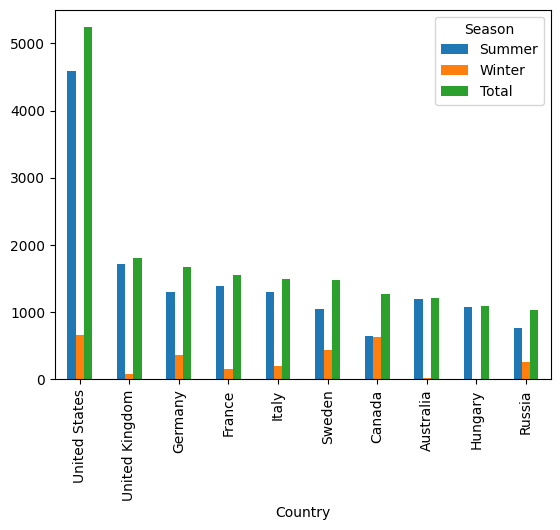

In [ ]:
season_count_df = season_count_df.sort_values(by='Total', ascending=False)
season_count_df.plot(kind='bar')